# Data Preprocessing

In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Data Importing
df = pd.read_spss('./Dataset_SPSS.sav')

In [3]:
# checking 5 sample of the dataset
df.sample(5)

,Gender,Birth_Weight,Birth_order,Premature_birth,Birth_asphyxia,BreastFeeding,Fathers_age,Mothers_age,Socio_economic,Fathers_education,...,Consanguinity,Threatened_bortion,Mothers_illness,Drug_use,Stress,Poor_nutrition,Vitamin_D_deficit,Mineral_deficiencies,Delivery_types,ASD
441,Female,Normal Weight,First Born,Yes,No,Less than 6 months,Less than 40,More than 35 years,Middle,Graduation,...,Not related,No,No,No,No,No,Yes,Yes,Cesarean section,0.0
238,Female,Normal Weight,Later Born,No,No,More than 12 months,Less than 40,21 to 35 years,Middle,Higher secondary level,...,Not related,No,No,No,No,Yes,Yes,Yes,Cesarean section,1.0
185,Male,Low Weight,First Born,No,No,More than 12 months,Less than 40,21 to 35 years,Higher,Graduation,...,Not related,No,No,No,Yes,No,No,No,Cesarean section,1.0
512,Female,Normal Weight,Later Born,No,No,6 to 12 months,Less than 40,More than 35 years,Middle,Graduation,...,Not related,No,Diabetics,Yes,Yes,Yes,No,Yes,Cesarean section,0.0
486,Male,Normal Weight,Later Born,No,Yes,More than 12 months,Less than 40,More than 35 years,Middle,Higher secondary level,...,Not related,No,No,Yes,No,No,No,Yes,Vaginal delivery,0.0


In [4]:
# Dataset shape
print("Dataset shape: ",df.shape)

Dataset shape:  (597, 26)


In [5]:
# Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                597 non-null    category
 1   Birth_Weight          597 non-null    category
 2   Birth_order           597 non-null    category
 3   Premature_birth       597 non-null    category
 4   Birth_asphyxia        597 non-null    category
 5   BreastFeeding         597 non-null    category
 6   Fathers_age           597 non-null    category
 7   Mothers_age           597 non-null    category
 8   Socio_economic        597 non-null    category
 9   Fathers_education     597 non-null    category
 10  Mothers_education     597 non-null    category
 11  Fathers_occupation    597 non-null    category
 12  Mothers_occupation    597 non-null    category
 13  Family_type           597 non-null    category
 14  Family_history        597 non-null    category
 15  Father

In [35]:
# All the columns of the dataset
df.columns

Index(['Gender', 'Birth_Weight', 'Birth_order', 'Premature_birth',
       'Birth_asphyxia', 'BreastFeeding', 'Fathers_age', 'Mothers_age',
       'Socio_economic', 'Fathers_education', 'Mothers_education',
       'Fathers_occupation', 'Mothers_occupation', 'Family_type',
       'Family_history', 'Father_illness', 'Consanguinity',
       'Threatened_bortion', 'Mothers_illness', 'Drug_use', 'Stress',
       'Poor_nutrition', 'Vitamin_D_deficit', 'Mineral_deficiencies',
       'Delivery_types', 'ASD'],
      dtype='object')

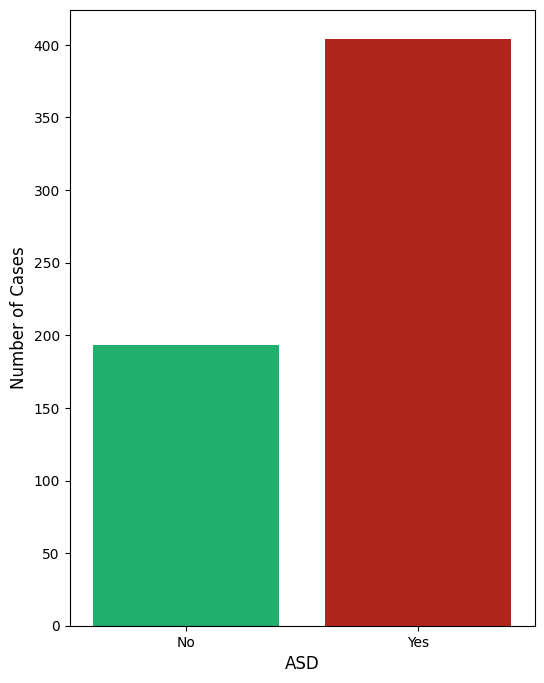

In [36]:
# ASD distribution
# Info of Dataset
ASD = df["ASD"].value_counts()
ASD = {
    "No": ASD[0],
    "Yes": ASD[1]
}
# Barplot of ASD of No and Yes Category
plt.figure(figsize=(6,8))
crest_palette = sns.color_palette("crest", as_cmap=False)
sns.barplot(x = ASD.keys(), y = ASD.values(), palette = ["#0ac76f", "#c91104"])
# plt.title("Bar plot of ASD", fontsize = 16)
plt.xlabel("ASD", fontsize = 12)
plt.ylabel("Number of Cases", fontsize = 12)
plt.savefig("./images/ASD_image", dpi = 600)
plt.show()

In [13]:
# description of the dataset
df.describe(include='all')

,Gender,Birth_Weight,Birth_order,Premature_birth,Birth_asphyxia,BreastFeeding,Fathers_age,Mothers_age,Socio_economic,Fathers_education,...,Consanguinity,Threatened_bortion,Mothers_illness,Drug_use,Stress,Poor_nutrition,Vitamin_D_deficit,Mineral_deficiencies,Delivery_types,ASD
count,597,597,597,597,597,597,597,597,597,597,...,597,597,597,597,597,597,597,597,597,597.000000
unique,2,2,2,2,2,3,2,3,3,4,...,2,2,3,2,2,2,2,2,2,NaN
top,Male,Normal Weight,First Born,No,No,More than 12 months,Less than 40,21 to 35 years,Middle,Graduation,...,Not related,No,No,No,Yes,No,No,No,Cesarean section,NaN
freq,316,433,344,401,434,413,407,301,454,244,...,468,538,404,425,350,440,443,434,389,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676717
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468122
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Feature Encoding

In [14]:
# Ordinal and Nominal Variables
ordinal_vars = ['Birth_order', 'BreastFeeding', 'Fathers_age', 'Mothers_age', 'Socio_economic', 'Fathers_education', 'Mothers_education',
                'Family_type', 'Delivery_types']
nominal_vars = ['Gender', 'Birth_Weight', 'Premature_birth', 'Birth_asphyxia', 'Fathers_occupation', 'Mothers_occupation', 'Family_history',
                 'Father_illness', 'Consanguinity', 'Threatened_bortion', 'Mothers_illness', 'Drug_use', 'Stress', 'Poor_nutrition', 'Vitamin_D_deficit', 'Mineral_deficiencies']

In [15]:
# Length of ordinal and nominal vriables
print("Lenth of Ordinal Variables",len(ordinal_vars))
print("Length of Nominal Variables",len(nominal_vars))

Lenth of Ordinal Variables 9
Length of Nominal Variables 16


In [16]:
# Seperation of Ordinal and Nominal Variables
X_ordinal = df[ordinal_vars]
X_nominal = df[nominal_vars]
y = df.ASD
X = df.drop("ASD",axis=1)

In [17]:
# Ordinal Variables Ordering
ordinal_variable_orders = [
    ['First Born','Later Born'],
    ['Less than 6 months', '6 to 12 months', 'More than 12 months'],
    ['Less than 40', 'Greater than 40'],
    ['Less than 21 years', '21 to 35 years', 'More than 35 years'],
    ['Low', 'Middle', 'Higher'],
    ['Secondary level', 'Higher secondary level', 'Higher education', 'Graduation'],
    ['Secondary level', 'Higher secondary level', 'Higher education', 'Graduation'],
    ['Nuclear family', 'Joint family'],
    ['Cesarean section', 'Vaginal delivery']
]

### Encoders
<ul>
    <li> Label Encoder for target variable</li>
    <li> Ordinal Encoder for Ordinal Variables</li>
    <li> One Hot Encoder for Nominal Variables</li>
</ul>

In [18]:
# Libraries for data encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [19]:
# Lebel encoder for target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
# One hot encoding for nominal variables
ohe = OneHotEncoder(drop="first",sparse_output=False)
# Fit and Transforming nominal variables
X_ohe = ohe.fit_transform(X_nominal)

In [21]:
# ohe.feature_name_combiner
features_name = ohe.get_feature_names_out()
# Creating Dataframe of New transformed nominal features
df_nominal = pd.DataFrame(X_ohe,columns = features_name)

In [22]:
# Ordinal Ecoding for Ordinal features
oe = OrdinalEncoder(categories=ordinal_variable_orders)
X_oe = oe.fit_transform(X_ordinal)
# Creating dataframe for transformed ordianl varibles
df_ordinal = pd.DataFrame(X_oe,columns=ordinal_vars)

In [23]:
# Creating dataframs after encoding all the featues
df2 = pd.concat([df_ordinal,df_nominal,pd.Series(y, name = "ASD")],axis=1)

In [24]:
df2.sample(5)

,Birth_order,BreastFeeding,Fathers_age,Mothers_age,Socio_economic,Fathers_education,Mothers_education,Family_type,Delivery_types,Gender_Male,...,Consanguinity_Not related,Threatened_bortion_Yes,Mothers_illness_No,Mothers_illness_Others,Drug_use_Yes,Stress_Yes,Poor_nutrition_Yes,Vitamin_D_deficit_Yes,Mineral_deficiencies_Yes,ASD
475,1.0,2.0,1.0,2.0,1.0,3.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0
490,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
591,0.0,1.0,0.0,2.0,1.0,3.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0
233,0.0,2.0,1.0,1.0,2.0,3.0,3.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1
458,1.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0


# Hyper Parameter Tunng and Evaluations

In [25]:
# Libraries for calculating the metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, roc_curve, auc, log_loss

In [26]:
# Function for Performance metrics
def model_report(y_act, y_pred, algorithm):
    
    images_folder = "images"  # Specify the desired folder name

    # Create the "images" folder if it doesn't exist
    if not os.path.exists(images_folder):
        os.mkdir(images_folder)
    
    print("Accuracy = ", accuracy_score(y_act, y_pred))
    print("Precision = " ,precision_score(y_act, y_pred,average='weighted'))
    print("Recall\Sensitivity = " ,recall_score(y_act, y_pred,average='weighted'))
    confusion = metrics.confusion_matrix(y_act, y_pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    specificity = TN / (TN + FP)
    print("Specificity = " ,specificity)
    print("F1 Score = " ,f1_score(y_act, y_pred,average='weighted'))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))
    print("Kappa score = ",cohen_kappa_score(y_act,y_pred))
    print("Log Loss = " ,log_loss(y_act, y_pred),"\n")
    print(classification_report(y_act,y_pred))
    
    plt.figure(figsize=(6,4))
    plt.title(f"Confusion Matrix of {algorithm}")
    sns.heatmap(confusion,annot=True,fmt="d",cmap="Greys")
    plt.xlabel("Predicted")
    plt.ylabel("Truth")
    plt.savefig(os.path.join(images_folder, f"{algorithm} confusion.png"), dpi=600)

In [27]:
# Roc Curve
def plot_roc_curve(clf, X_test, y_test, figsize=(8, 6), RFC=False , algorithm = None):
    images_folder = "images"  # Specify the desired folder name

    # Create the "images" folder if it doesn't exist
    if not os.path.exists(images_folder):
        os.mkdir(images_folder)
    

    # Get class probabilities or decision function scores
    if RFC:
        y_score = clf.predict_proba(X_test)[:, 1]  # Use probabilities for positive class
    else:
        y_score = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    fig, ax = plt.subplots(figsize=figsize)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic of {algorithm}')
    plt.plot(fpr, tpr)
    plt.grid(alpha=0.4)
    plt.savefig(os.path.join(images_folder, f"{algorithm} roc_curve.png"), dpi=600)
    plt.show()

## Train Test Split

In [28]:
# Library loading for train-test split and Normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  Normalizer

In [29]:
X,y = df2.drop("ASD", axis = 1), df2.ASD

In [30]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, stratify=y,random_state=42)

In [31]:
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [32]:
# Shape of the Train Feature variables
X_train_norm.shape, y_train.shape

((417, 29), (417,))

## Hyper Parameter Tunings and Model Fittings

In [33]:
# Loading Libraries for necessary ML algorithms and model selection 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

### Logistic Regression

In [37]:
# Hyper Parameter Grid
param_grid_logit = {
    "penalty" : ["l1","l2","elasticnet",None],
    "class_weight" : ["balanced",None],
    "random_state" : [1,10,25,50],
    "solver" : ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"],
    "max_iter" :  [100,300,500,1000],
    "multi_class" : ["auto","ovr","multinomial"]
}
# Defining the Logistic Regression Object
model_logit = LogisticRegression()
# Gried Search 
grid_search_logit = GridSearchCV(model_logit, param_grid_logit, cv = 5, scoring = "accuracy")
# Fitting the Grid Search
grid_search_logit.fit(X_train_norm, y_train)
# Best model from Grid Search
best_model_logit = grid_search_logit.best_estimator_
# Best parameter of Grid Search
best_params_logit = grid_search_logit.best_params_

print("Best Parameters: ", best_params_logit)
# Evaluatin the best model n the testing set
best_model_logit_score = best_model_logit.score(X_test,y_test)

Best Parameters:  {'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'auto', 'penalty': None, 'random_state': 1, 'solver': 'sag'}


Accuracy =  0.9833333333333333
Precision =  0.9837333333333333
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9482758620689655
F1 Score =  0.9832133089701791
AUC Score = 0.9741379310344828
Kappa score =  0.9613180515759312
Log Loss =  0.6007275564852861 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.98      1.00      0.99       122

    accuracy                           0.98       180
   macro avg       0.99      0.97      0.98       180
weighted avg       0.98      0.98      0.98       180



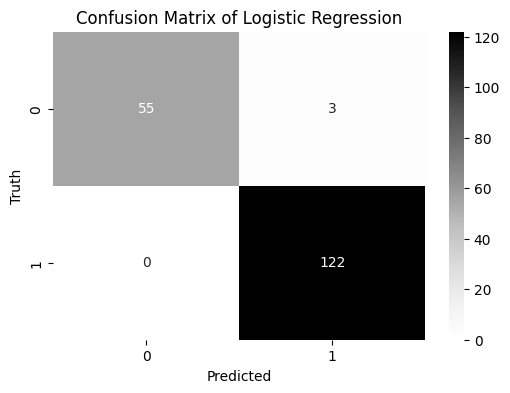

In [38]:
# Creating object of Logistic Regression based on best parameters
model_logit_final = LogisticRegression(class_weight = "balanced", max_iter = 100, multi_class = 'auto', penalty = None, random_state = 1, solver = 'sag')
# Fitting the model
model_logit_final.fit(X_train_norm,y_train)
# Prediction of the model
y_pred_logit = model_logit_final.predict(X_test_norm)
# Model evaluation 
model_report(y_test,y_pred_logit, "Logistic Regression")

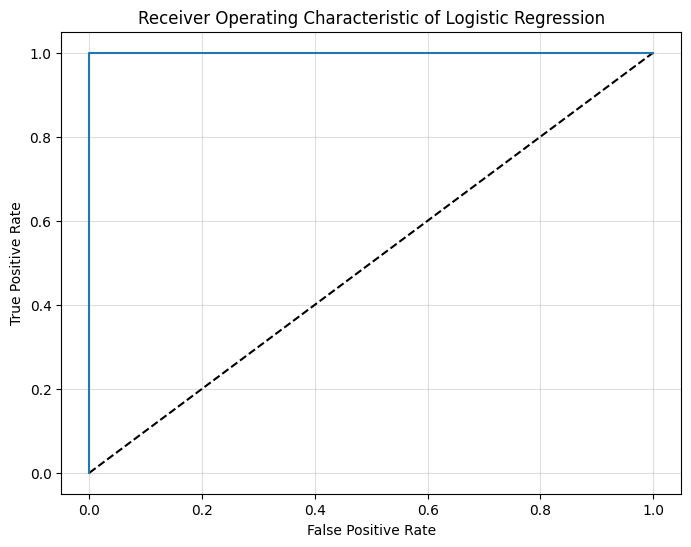

In [39]:
plot_roc_curve(model_logit_final, X_test_norm, y_test, algorithm = "Logistic Regression")

### SVM

In [40]:
# Hyper parameter Grid for SVM
c = [int(x) for x in np.linspace(1,100,10)]
d = [int(x) for x in np.linspace(3,10,10)]

param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3, 4]
}
# SVM object
model_svm = SVC()
# Grid Search
grid_search_svm = GridSearchCV(model_svm, param_grid_svm,cv = 5, scoring = "accuracy")
# Grid Search fit
grid_search_svm.fit(X_train_norm, y_train)
# Best Moel for SVM using Grid Search
best_model_svm = grid_search_svm.best_estimator_
# # Best parameter for SVM using Grid Search
best_model_params = grid_search_svm.best_params_

# best_mode_score = best_model_svm.score(X_test_norm,y_test)
# # Best Parameters
print("Best Params: ", best_model_params)


Best Params:  {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


Accuracy =  0.9777777777777777
Precision =  0.9778481822836661
Recall\Sensitivity =  0.9777777777777777
Specificity =  0.9482758620689655
F1 Score =  0.9776731802405743
AUC Score = 0.9700395703787451
Kappa score =  0.9486594409583571
Log Loss =  0.8009700753137147 

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.98      0.99      0.98       122

    accuracy                           0.98       180
   macro avg       0.98      0.97      0.97       180
weighted avg       0.98      0.98      0.98       180



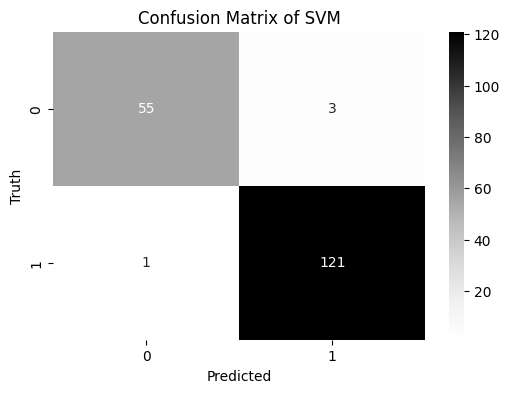

In [41]:
# SVM model using the best parameters
model_svm_final = SVC(C = 0.1, degree=3, gamma= 'scale', kernel= 'poly')
# Fitting the model 
model_svm_final.fit(X_train_norm, y_train)
# predicting using the fitted model
y_pred_svm = model_svm_final.predict(X_test_norm)
# model evaluation
model_report(y_test, y_pred_svm,"SVM")

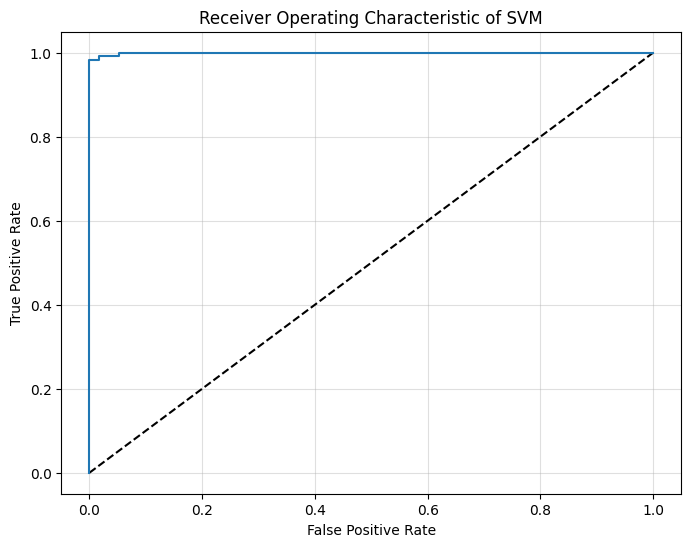

In [42]:
plot_roc_curve(model_svm_final, X_test_norm, y_test, algorithm="SVM")

### Random Forest Classifier

In [43]:
# Hyper parameter grid for RFC
param_grid_rfc = {
    'n_estimators': [200,400,600,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10,30,50,100],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['entropy', 'gini']

}
# RFC classifer object
model_rfc = RandomForestClassifier()
# Randomized search 
grid_search_rfc = RandomizedSearchCV( model_rfc, param_grid_rfc, cv = 5, scoring="accuracy")

# Perform Grid Search
grid_search_rfc.fit(X_train_norm, y_train)

# Get the best model and its parameters
best_model_rfc = grid_search_rfc.best_estimator_
best_params_rfc = grid_search_rfc.best_params_

best_model_score = best_model_rfc.score(X_test_norm,y_test)
print("Best Params: ", best_params_rfc)


Best Params:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'entropy'}


Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  2.220446049250313e-16 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       122

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



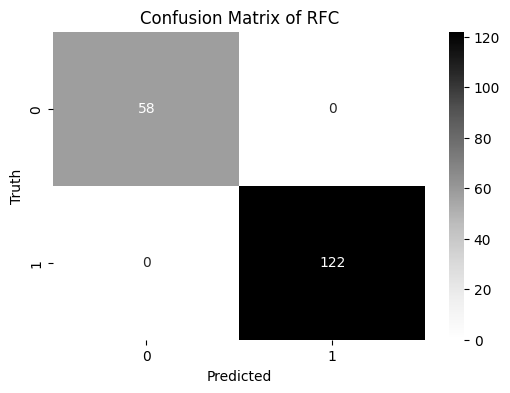

In [44]:
# RFC model based on best hyper parameters
model_rfc_final = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 6, max_features = 'sqrt', max_depth = 10, criterion = 'entropy')
# Fitting the model
model_rfc_final.fit(X_train_norm, y_train)
# predicting using the model
y_pred_rfc = model_rfc_final.predict(X_test_norm)
# Model Evaluation
model_report(y_test,y_pred_rfc,"RFC")

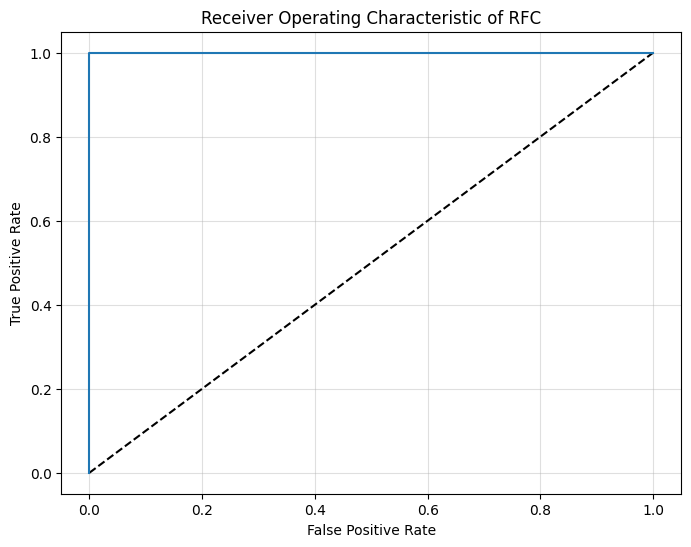

In [45]:
plot_roc_curve(model_rfc_final, X_test_norm,y_test, RFC= True, algorithm="RFC")

### Decision Tree

In [46]:
# Hyper parameter grid for Decision Tree
param_grid_dt = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best","random"],
    "min_samples_split" : [1,2,3,4,5],
    "max_features" : [None,"auto","sqrt","log2"]
}
# Decision Tree object
model_dt = tree.DecisionTreeClassifier()
grid_search_dt = GridSearchCV( model_dt, param_grid_dt, cv = 5, scoring="accuracy")

# Perform Grid Search
grid_search_dt.fit(X_train_norm, y_train)

# Get the best model and its parameters
best_model_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

best_model_score = best_model_dt.score(X_test_norm,y_test)
print("Best Params: ", best_params_dt)


Best Params:  {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 2, 'splitter': 'random'}


Accuracy =  0.9777777777777777
Precision =  0.9784832451499118
Recall\Sensitivity =  0.9777777777777777
Specificity =  0.9310344827586207
F1 Score =  0.9775601638504864
AUC Score = 0.9655172413793103
Kappa score =  0.9481865284974094
Log Loss =  0.8009700753137147 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.97      1.00      0.98       122

    accuracy                           0.98       180
   macro avg       0.98      0.97      0.97       180
weighted avg       0.98      0.98      0.98       180



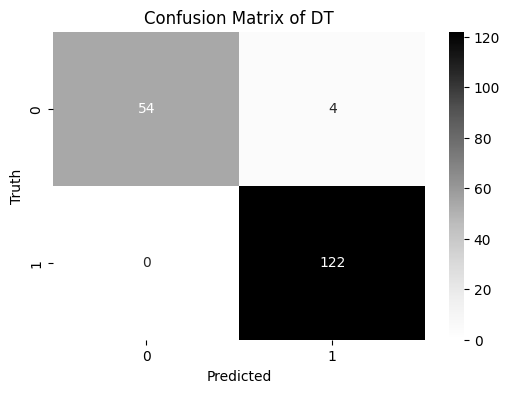

In [47]:
# Best model of Decision Tree based on best hyper parameters
model_dt_final = tree.DecisionTreeClassifier(criterion = 'entropy', max_features = None, min_samples_split = 2, splitter = 'best')
# Fitting the model
model_dt_final.fit(X_train_norm, y_train)
# Predicting using the 
y_pred_dt = model_dt_final.predict(X_test_norm)
# Model evaluation
model_report(y_test,y_pred_dt, "DT")

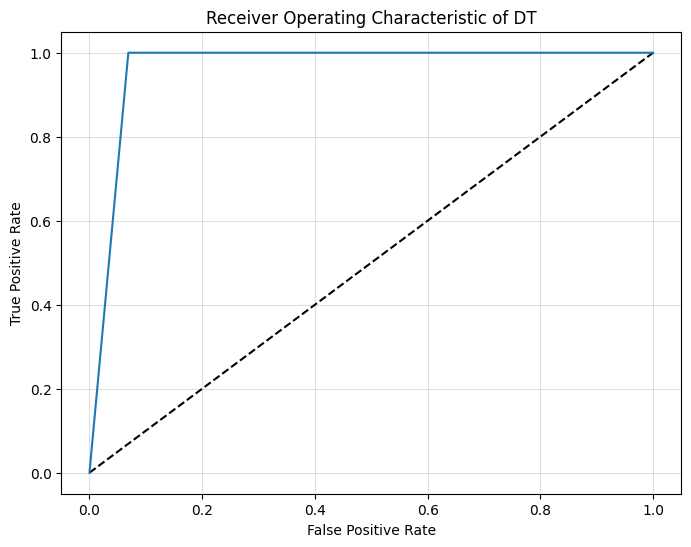

In [48]:
plot_roc_curve(model_dt_final, X_test_norm, y_test,RFC = True ,algorithm='DT')

### Naive Bayes

In [49]:
# Hyper parameter grid sof Naive Bayes
param_grid_nb = {
    "alpha": [1e-10, 1e-9, 1e-8, 1e-7],  # Grid for smoothing parameter
     "force_alpha": [True, False]
}
# NB object
model_nb = BernoulliNB()
# Grid Search
grid_search_nb = GridSearchCV(model_nb, param_grid_nb, cv = 5, scoring = "accuracy")

# Perform Grid Search
grid_search_nb.fit(X_train_norm, y_train)

# Get the best model and its parameters
best_model_nb = grid_search_nb.best_estimator_
best_params_nb = grid_search_nb.best_params_

best_model_score = best_model_nb.score(X_test_norm,y_test)
print("Best Params: ", best_params_nb)

Best Params:  {'alpha': 1e-10, 'force_alpha': True}


Accuracy =  0.9222222222222223
Precision =  0.9222222222222223
Recall\Sensitivity =  0.9222222222222223
Specificity =  0.8793103448275862
F1 Score =  0.9222222222222223
AUC Score = 0.9109666478236291
Kappa score =  0.8219332956472584
Log Loss =  2.803395263598001 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.94      0.94      0.94       122

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



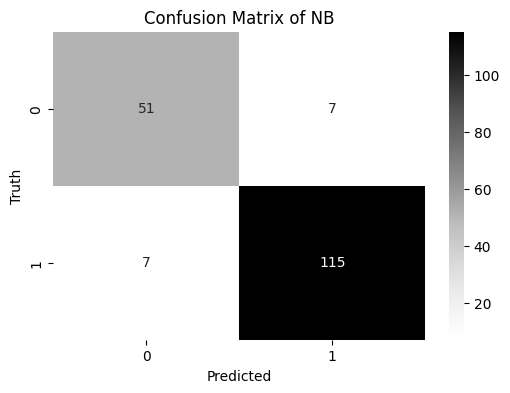

In [50]:
# Model based on best hyper parameters
model_nb_final = BernoulliNB(alpha = 1e-10, force_alpha=True)
# Fitting the model
model_nb_final.fit(X_train_norm, y_train)
# Predicting using the fitted model
y_pred_nb = model_nb_final.predict(X_test_norm)
# Model evaluation
model_report(y_test,y_pred_nb,"NB")

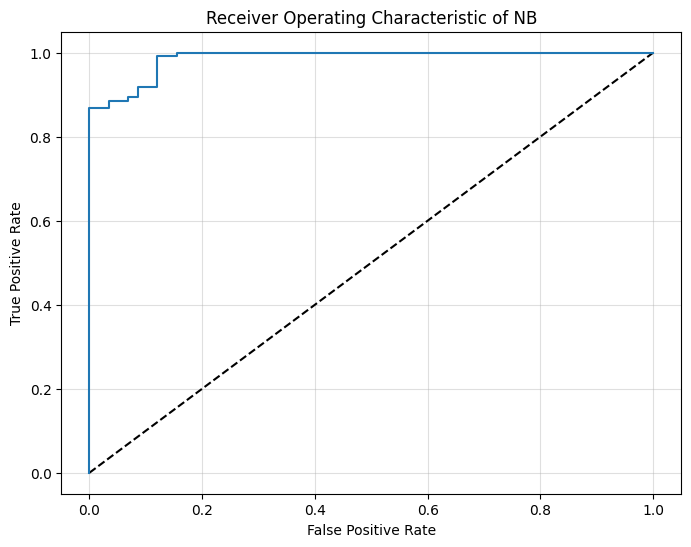

In [51]:
plot_roc_curve(model_nb_final, X_test_norm, y_test,RFC = True ,algorithm='NB')

### KNN

In [52]:
# Hyper parameter Tuning 
param_grid_knn = {
    "n_neighbors" : [3,4,5,8,10], # default 5
    "weights" : ["uniform","distance"],
    "algorithm" : ["auto","ball_tree","kd_tree","brute"], # default = "auto
    "leaf_size" : [10,20,30,40,50], # default 30
}

model_knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV( model_knn, param_grid_knn, cv = 5, scoring="accuracy")

# Perform Grid Search
grid_search_knn.fit(X_train_norm, y_train)

# Get the best model and its parameters
best_model_knn = grid_search_knn.best_estimator_
best_params_knn = grid_search_knn.best_params_

best_model_score = best_model_knn.score(X_test_norm,y_test)
print("Best Params: ", best_params_knn)

Best Params:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}


Accuracy =  0.9666666666666667
Precision =  0.9666282642089095
Recall\Sensitivity =  0.9666666666666667
Specificity =  0.9310344827586207
F1 Score =  0.9665097703608615
AUC Score = 0.9573205200678349
Kappa score =  0.9229891614375356
Log Loss =  1.201455112970572 

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.97      0.98      0.98       122

    accuracy                           0.97       180
   macro avg       0.97      0.96      0.96       180
weighted avg       0.97      0.97      0.97       180



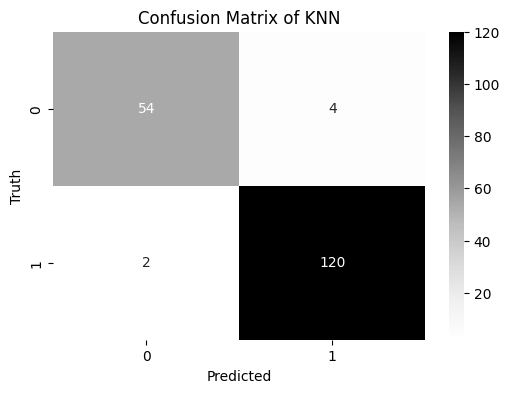

In [53]:
# Model fit and evaluation based on best hyper parameters
model_knn_final = KNeighborsClassifier(algorithm = 'auto', leaf_size = 10, n_neighbors = 4, weights = 'distance')
model_knn_final.fit(X_train_norm, y_train)
y_pred_knn = model_knn_final.predict(X_test_norm)
model_report(y_test,y_pred_knn, "KNN")

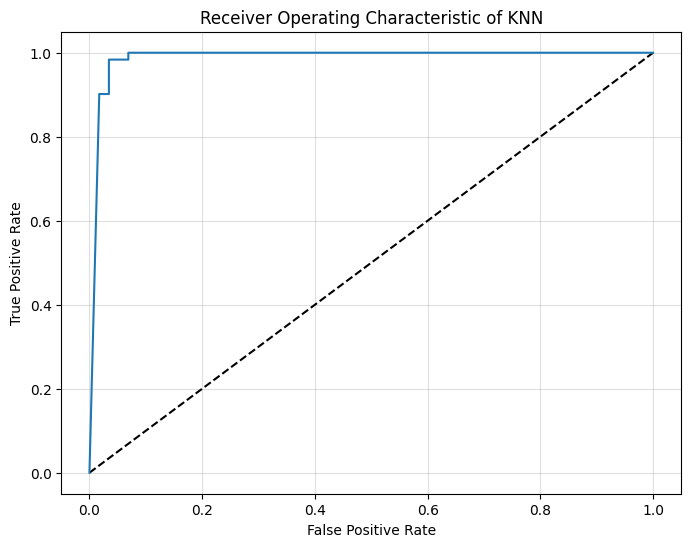

In [54]:
plot_roc_curve(model_knn_final, X_test_norm, y_test,RFC = True ,algorithm='KNN')

### MLP

In [55]:
# Hyper parameter tuning
param_grid_mlp = {
    'hidden_layer_sizes': [(32,), (64,), (128,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}

model_mlp = MLPClassifier(random_state=42)
grid_search_mlp = GridSearchCV(model_mlp, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train_norm, y_train)

best_model_mlp = grid_search_mlp.best_estimator_
best_model_mlp_params = grid_search_mlp.best_params_
print("Best Params: ", best_model_mlp_params)

Best Params:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (32,), 'solver': 'lbfgs'}


Accuracy =  0.9833333333333333
Precision =  0.9837333333333333
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9482758620689655
F1 Score =  0.9832133089701791
AUC Score = 0.9741379310344828
Kappa score =  0.9613180515759312
Log Loss =  0.6007275564852861 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.98      1.00      0.99       122

    accuracy                           0.98       180
   macro avg       0.99      0.97      0.98       180
weighted avg       0.98      0.98      0.98       180



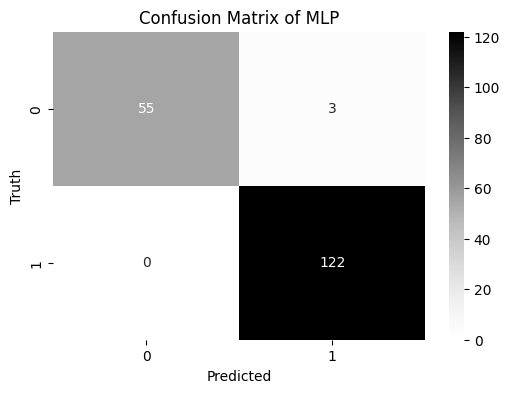

In [56]:
# Model fitting and evaluation based on best hyper parameters
model_mlp_final = MLPClassifier( activation = 'relu', alpha = 0.001, hidden_layer_sizes = (32,), solver = 'lbfgs')
model_mlp_final.fit(X_train_norm,y_train)
y_pred_mlp = model_mlp_final.predict(X_test_norm)
model_report(y_test,y_pred_mlp, "MLP")

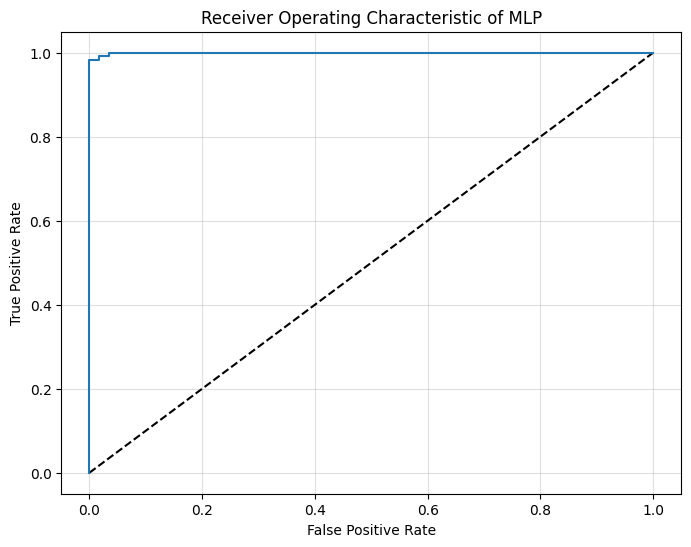

In [57]:
plot_roc_curve(model_mlp_final, X_test_norm, y_test,RFC = True ,algorithm='MLP')

### XGBoost

In [58]:
# Hyper parameter Tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.5],  # Shrinkage parameter
    'max_depth': [3, 5, 8],  # Maximum depth of trees
    'subsample': [0.5, 0.7, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.5, 0.7, 1.0],  # Fraction of features per tree
}

model_xbg = XGBClassifier(random_state=42)  
grid_search_xgb = GridSearchCV(model_xbg, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_norm, y_train)

best_model_xgb = grid_search_xgb.best_estimator_
best_model_params_xgb = grid_search_xgb.best_params_

print("Best Params: ", best_model_params_xgb)


Best Params:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}


Accuracy =  1.0
Precision =  1.0
Recall\Sensitivity =  1.0
Specificity =  1.0
F1 Score =  1.0
AUC Score = 1.0
Kappa score =  1.0
Log Loss =  2.220446049250313e-16 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       122

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



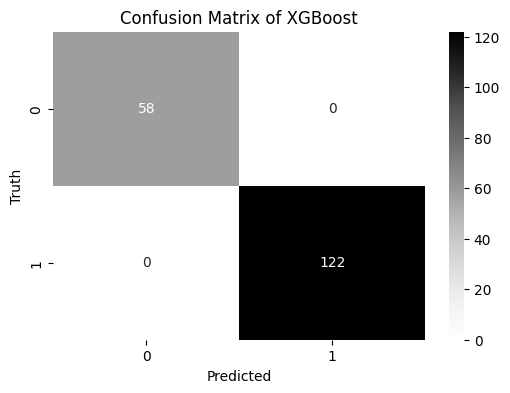

In [59]:
## Model fit and evaluationg based on best hyper parameters
model_xgb_final = XGBClassifier(random_state=42,colsample_bytree = 0.5, learning_rate = 0.01, max_depth = 3, n_estimators = 200, subsample = 0.5)
model_xgb_final.fit(X_train_norm,y_train)
y_pred_xgb = model_xgb_final.predict(X_test_norm)
model_report(y_test,y_pred_xgb,"XGBoost")

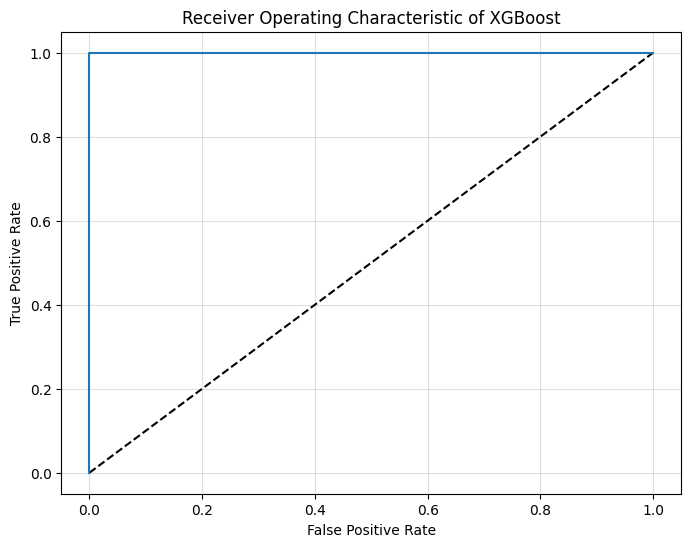

In [60]:
plot_roc_curve(model_xgb_final, X_test_norm, y_test,RFC = True ,algorithm='XGBoost')

### Artificial Neural Network

In [61]:
# Libarry for ANN
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

In [62]:
# Defining model and hyper paramter tuning
def create_model(optimizer='adam', neurons=50, activation='relu'):
    model = Sequential()
    # Add layers according to your architecture (e.g., Dense layers)
    model.add(Dense(neurons, activation=activation, input_shape=(None,417,29))) #417, 29
    # ... more layers ...
    model.add(Dense(1))  # Output layer for regression
    model.compile(loss='mse', optimizer=optimizer)  # Adjust loss for classification
    return model

param_grid = {
    'model__optimizer': ['adam', 'rmsprop', 'nadam'],
    'model__neurons': [10, 25, 50, 100],
    'model__activation': ['relu', 'tanh'],
    # ... other hyperparameters ...
}


# Choose GridSearchCV or RandomizedSearchCV
model = KerasRegressor(build_fn=create_model, epochs=100, verbose=0)  # Adjust epochs
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# Or use RandomizedSearchCV for a larger hyperparameter space
grid_result = grid.fit(X_train_norm, y_train)


best_model_params = grid_result.best_params_
print("Best Params: ", best_model_params)





Best Params:  {'model__activation': 'relu', 'model__neurons': 100, 'model__optimizer': 'rmsprop'}


In [63]:
best_model_ann = grid_result.best_estimator_
y_pred_ann = best_model_ann.predict(X_test_norm)

Accuracy =  0.9777777777777777
Precision =  0.9784832451499118
Recall\Sensitivity =  0.9777777777777777
Specificity =  0.9310344827586207
F1 Score =  0.9775601638504864
AUC Score = 0.9655172413793103
Kappa score =  0.9481865284974094
Log Loss =  0.3542753421797288 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.97      1.00      0.98       122

    accuracy                           0.98       180
   macro avg       0.98      0.97      0.97       180
weighted avg       0.98      0.98      0.98       180



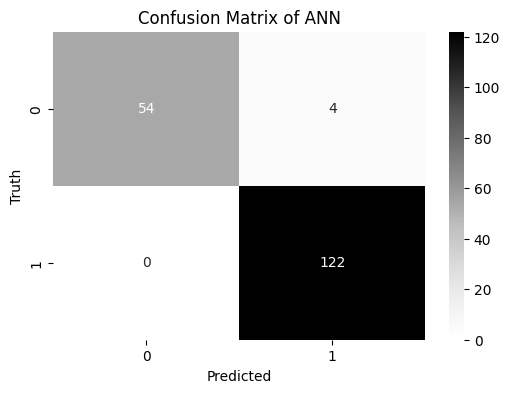

In [64]:
# preciditon and evaluation based on best hyper parameters
y_pred_ann2 =np.round(y_pred_ann)
model_report(y_test,y_pred_ann2, "ANN")

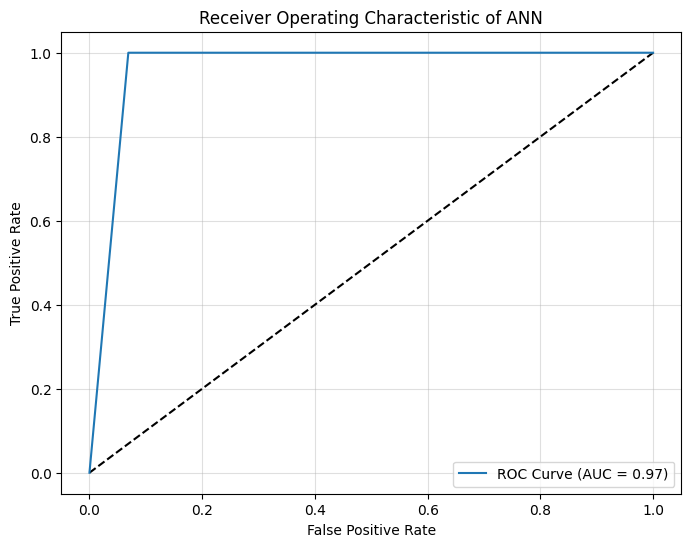

In [65]:
images_folder = "images"

if not os.path.exists(images_folder):
    os.mkdir(images_folder)
fpr, tpr,_ = roc_curve(y_test, y_pred_ann2)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of ANN')
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.savefig(os.path.join(images_folder, f" ANN roc_curve.png"), dpi=600)
plt.show()    


# Feature Selection

## Chi Square

In [66]:
# Library for chi-square feature selecton
from sklearn.feature_selection import chi2

In [67]:
# short names for the features 
var_names = ["BO","BF","FA","MA","SE","FE","ME","FT","DT","G","BW_N","BW_P","BA","FO","MO_H","MO_U","FH_N","FH_S","FI_N","FI_O","Con","TA","MI_N", "MI_O","DU","Str","PN","VD","MD"]

In [68]:
# calculating the chi2 and p value 
chi2_score, pval = chi2(X_train_norm, y_train)

In [69]:
# Creating a dataframe of the chi-square results
Chi2_dataframe = pd.DataFrame([X_train.columns, var_names, chi2_score, pval], index = ["Variables","Features", "Chi2", "pvalues"]).T

In [70]:
Chi2_dataframe

,Variables,Features,Chi2,pvalues
0,Birth_order,BO,1.207199,0.271887
1,BreastFeeding,BF,0.150608,0.697955
2,Fathers_age,FA,0.505807,0.47696
3,Mothers_age,MA,21.429816,0.000004
4,Socio_economic,SE,0.228265,0.632813
5,Fathers_education,FE,1.874969,0.170907
6,Mothers_education,ME,0.010602,0.917988
7,Family_type,FT,0.791892,0.373529
8,Delivery_types,DT,2.356108,0.124793
9,Gender_Male,G,0.217763,0.64075


In [71]:
Chi2_dataframe[Chi2_dataframe["pvalues"] <= 0.05]

,Variables,Features,Chi2,pvalues
3,Mothers_age,MA,21.429816,0.000004
14,Mothers_occupation_Housewife,MO_H,20.544064,0.000006
15,Mothers_occupation_Unemployed,MO_U,45.789565,0.0
17,Family_history_Sibling history of ASD,FH_S,4.141251,0.04185
19,Father_illness_Others,FI_O,5.814317,0.015896
23,Mothers_illness_Others,MI_O,8.241513,0.004094
24,Drug_use_Yes,DU,3.911235,0.047964
25,Stress_Yes,Str,5.211542,0.022437


In [72]:
Chi2_dataframe_sorted = Chi2_dataframe.sort_values("pvalues")

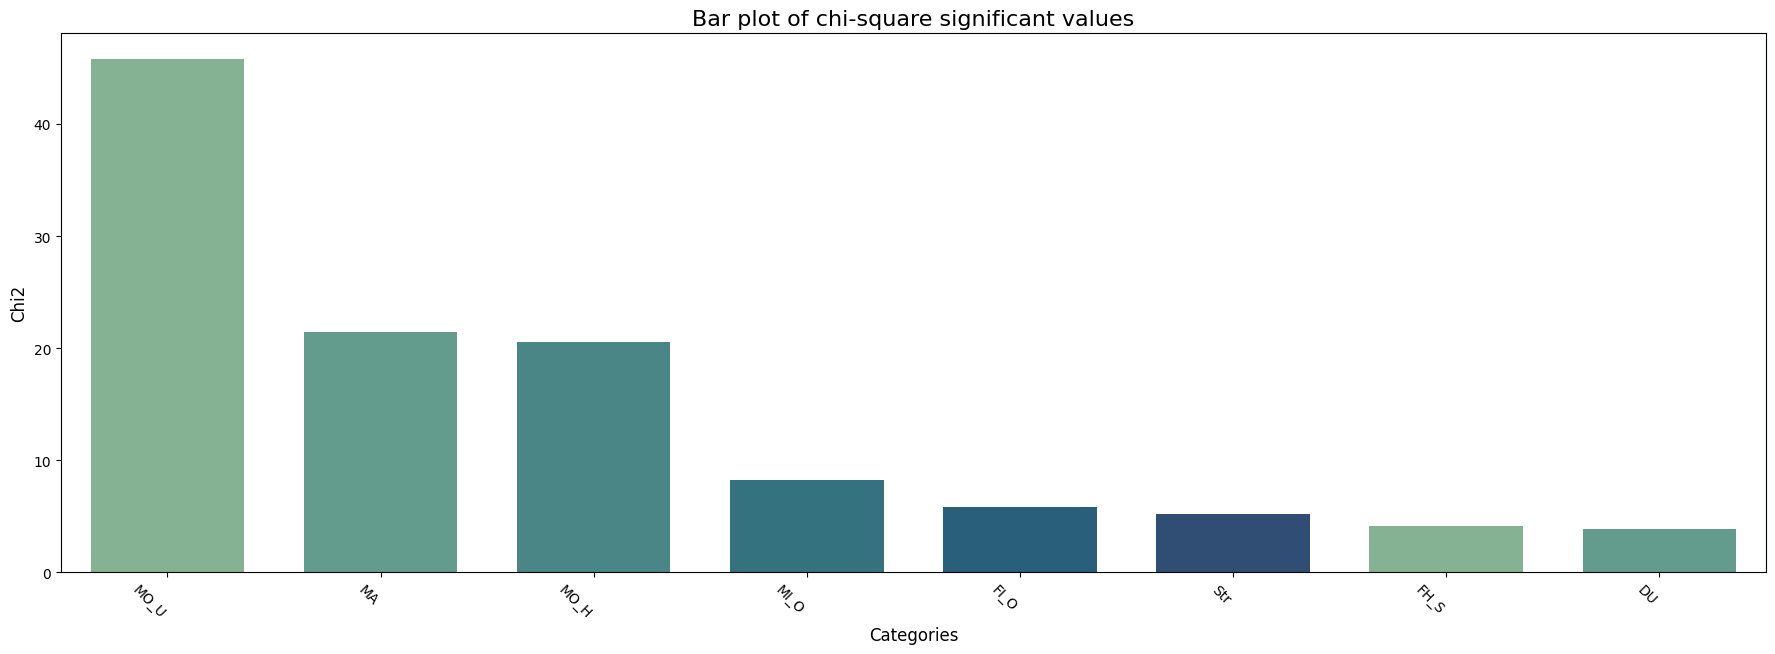

In [73]:
# dataframe of the significant p-values of chi-square features selection
df_chi2_sig = Chi2_dataframe_sorted[Chi2_dataframe["pvalues"] < 0.05]
# bar graph of the significant chi-square statistics
plt.figure(figsize = (22,7))
crest_palette = sns.color_palette("crest", as_cmap=False)
sns.barplot(x = df_chi2_sig["Features"], y =df_chi2_sig["Chi2"] , palette = crest_palette,saturation=0.75,gap = .1,
        )
plt.title("Bar plot of chi-square significant values", fontsize = 16)
plt.xlabel("Categories", fontsize = 12)
plt.ylabel("Chi2", fontsize = 12)
plt.xticks(rotation=-45, ha='right')
plt.savefig("./images/chi_sq_selected_features.png", dpi = 500)
plt.show()

### Model fitting with chi-square selected features

In [76]:
df2_chi2_selected = df2[df_chi2_sig.Variables]

In [77]:
# train test split based on the signiciant variables
X_train_chi, X_test_chi, y_train, y_test = train_test_split(df2_chi2_selected,y, test_size=.3, stratify=y, random_state=42)

In [78]:
X_train_chi_norm = normalizer.fit_transform(X_train_chi)
X_test_chi_norm = normalizer.fit_transform(X_test_chi)

#### Logistic Regression

Accuracy =  0.9444444444444444
Precision =  0.9463884332665087
Recall\Sensitivity =  0.9444444444444444
Specificity =  0.9482758620689655
F1 Score =  0.9449074074074074
AUC Score = 0.9454494064443189
Kappa score =  0.8750694058856191
Log Loss =  2.002425188284286 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        58
           1       0.97      0.94      0.96       122

    accuracy                           0.94       180
   macro avg       0.93      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180



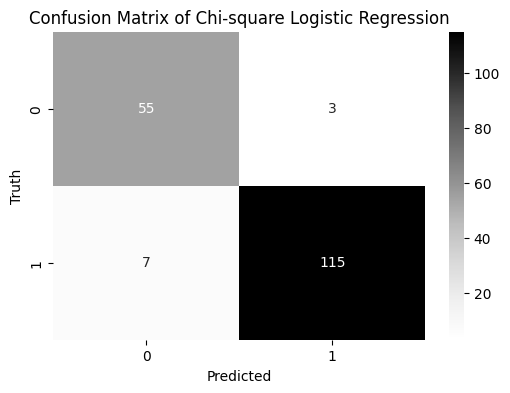

In [79]:
model_logit_final.fit(X_train_chi_norm,y_train)
model_report(y_test, model_logit_final.predict(X_test_chi_norm),"Chi-square Logistic Regression")

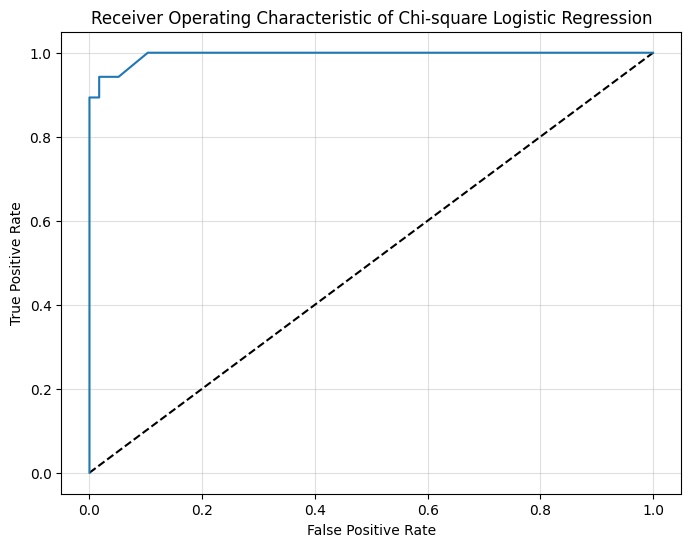

In [80]:
plot_roc_curve(model_logit_final, X_test_chi_norm, y_test,RFC = False ,algorithm='Chi-square Logistic Regression')

#### SVM

Accuracy =  0.9388888888888889
Precision =  0.940241233105264
Recall\Sensitivity =  0.9388888888888889
Specificity =  0.9310344827586207
F1 Score =  0.9392788373994135
AUC Score = 0.9368287167891464
Kappa score =  0.8619631901840491
Log Loss =  2.202667707112715 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        58
           1       0.97      0.94      0.95       122

    accuracy                           0.94       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.94      0.94      0.94       180



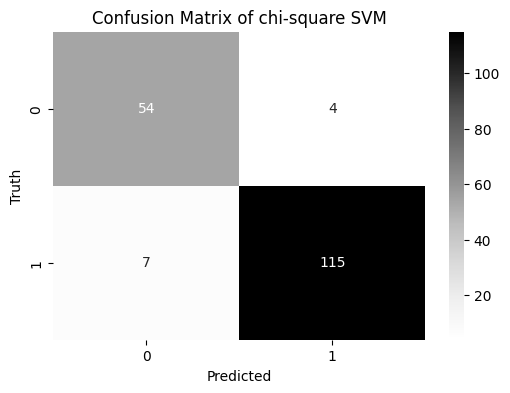

In [81]:
model_svm_final.fit(X_train_chi_norm,y_train)
model_report(y_test,model_svm_final.predict(X_test_chi_norm), "chi-square SVM")

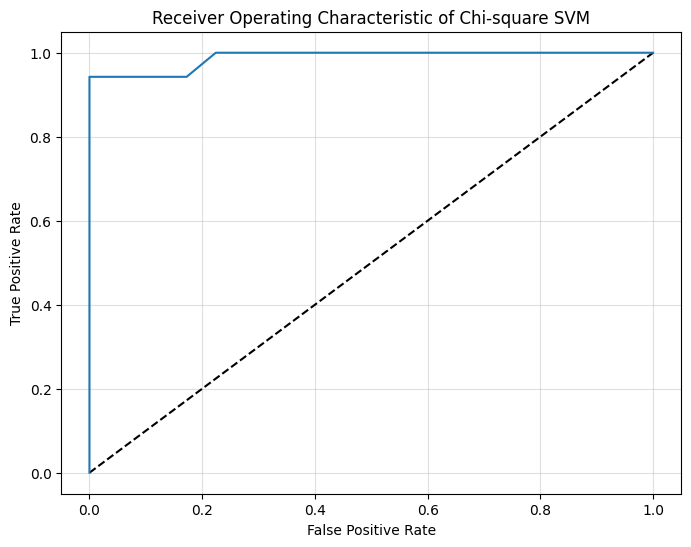

In [82]:
plot_roc_curve(model_svm_final, X_test_chi_norm, y_test,RFC = False ,algorithm='Chi-square SVM')

#### Random Forest

Accuracy =  0.9555555555555556
Precision =  0.9589140325670498
Recall\Sensitivity =  0.9555555555555556
Specificity =  0.9827586206896551
F1 Score =  0.956088227640783
AUC Score = 0.9626907857546636
Kappa score =  0.9009356081452944
Log Loss =  1.6019401506274291 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.99      0.94      0.97       122

    accuracy                           0.96       180
   macro avg       0.94      0.96      0.95       180
weighted avg       0.96      0.96      0.96       180



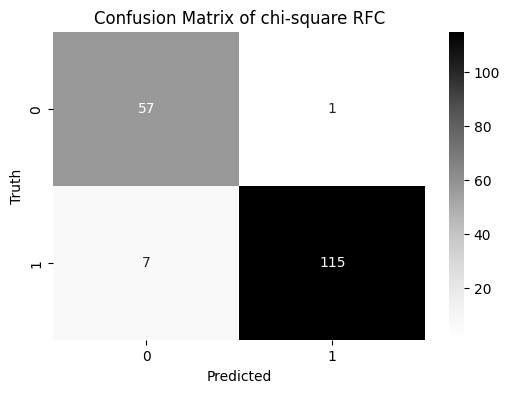

In [83]:
model_rfc_final.fit(X_train_chi_norm,y_train)
model_report(y_test, model_rfc_final.predict(X_test_chi_norm), "chi-square RFC")

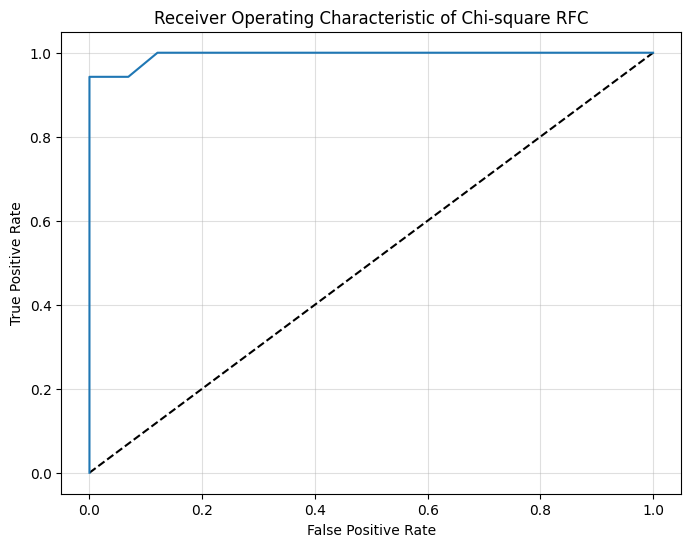

In [84]:
plot_roc_curve(model_rfc_final, X_test_chi_norm, y_test,RFC = True ,algorithm='Chi-square RFC')

#### Decision Tree

Accuracy =  0.9555555555555556
Precision =  0.9589140325670498
Recall\Sensitivity =  0.9555555555555556
Specificity =  0.9827586206896551
F1 Score =  0.956088227640783
AUC Score = 0.9626907857546636
Kappa score =  0.9009356081452944
Log Loss =  1.6019401506274291 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.99      0.94      0.97       122

    accuracy                           0.96       180
   macro avg       0.94      0.96      0.95       180
weighted avg       0.96      0.96      0.96       180



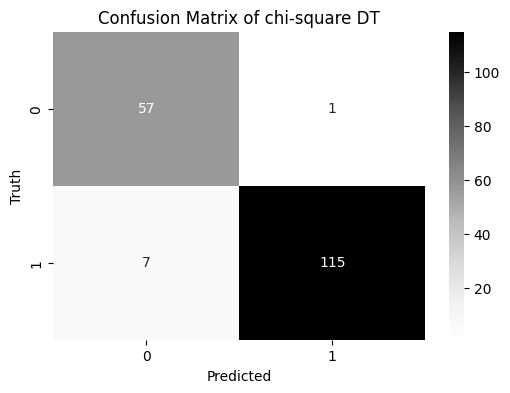

In [85]:
model_dt_final.fit(X_train_chi_norm,y_train)
model_report(y_test, model_dt_final.predict(X_test_chi_norm),"chi-square DT")

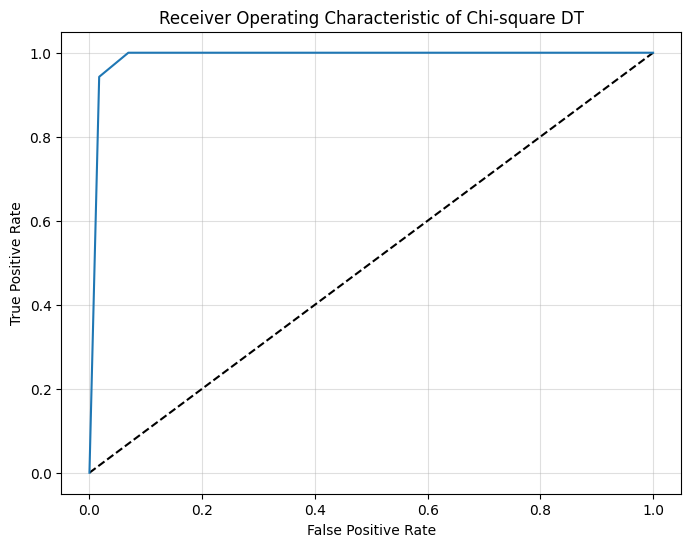

In [86]:
plot_roc_curve(model_dt_final, X_test_chi_norm, y_test,RFC = True ,algorithm='Chi-square DT')

#### Naive Bayes

Accuracy =  0.9222222222222223
Precision =  0.9222222222222223
Recall\Sensitivity =  0.9222222222222223
Specificity =  0.8793103448275862
F1 Score =  0.9222222222222223
AUC Score = 0.9109666478236291
Kappa score =  0.8219332956472584
Log Loss =  2.803395263598001 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.94      0.94      0.94       122

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



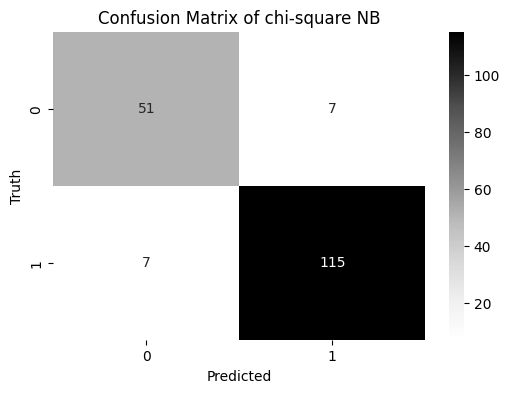

In [87]:
model_nb_final.fit(X_train_chi_norm,y_train)
model_report(y_test, model_nb_final.predict(X_test_chi_norm),"chi-square NB")

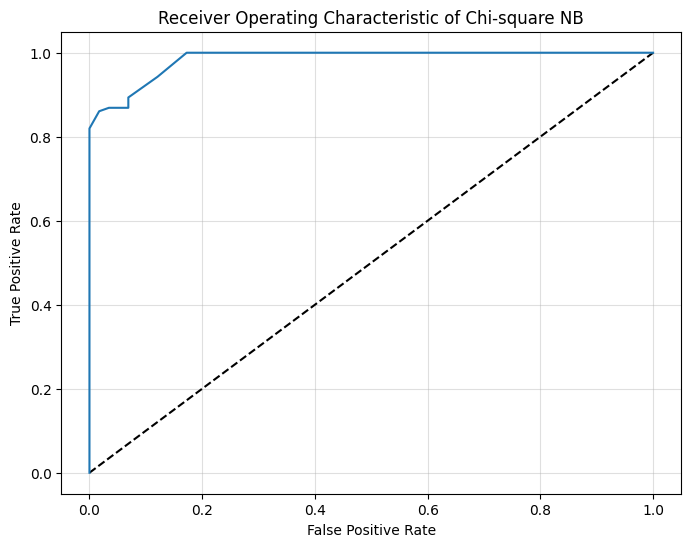

In [88]:
plot_roc_curve(model_nb_final, X_test_chi_norm, y_test,RFC = True ,algorithm='Chi-square NB')

#### KNN

Accuracy =  0.9666666666666667
Precision =  0.9682291666666667
Recall\Sensitivity =  0.9666666666666667
Specificity =  0.896551724137931
F1 Score =  0.9661575757575758
AUC Score = 0.9482758620689655
Kappa score =  0.9215572341661824
Log Loss =  1.201455112970572 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        58
           1       0.95      1.00      0.98       122

    accuracy                           0.97       180
   macro avg       0.98      0.95      0.96       180
weighted avg       0.97      0.97      0.97       180



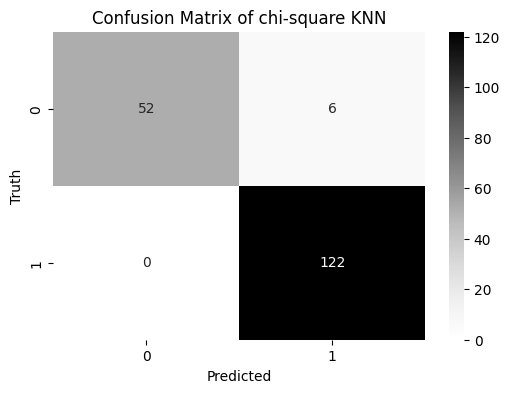

In [89]:
model_knn_final.fit(X_train_chi_norm,y_train)
model_report(y_test, model_knn_final.predict(X_test_chi_norm), "chi-square KNN")

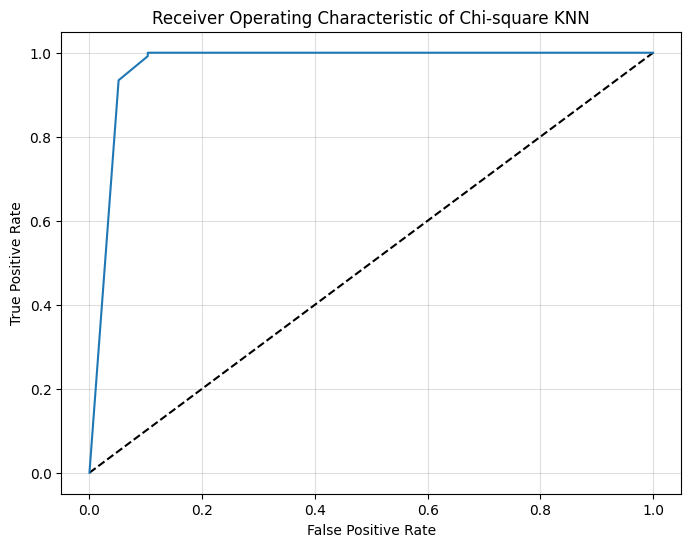

In [90]:
plot_roc_curve(model_knn_final, X_test_chi_norm, y_test,RFC = True ,algorithm='Chi-square KNN')

#### MLP

Accuracy =  0.9444444444444444
Precision =  0.9463884332665087
Recall\Sensitivity =  0.9444444444444444
Specificity =  0.9482758620689655
F1 Score =  0.9449074074074074
AUC Score = 0.9454494064443189
Kappa score =  0.8750694058856191
Log Loss =  2.002425188284286 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        58
           1       0.97      0.94      0.96       122

    accuracy                           0.94       180
   macro avg       0.93      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180



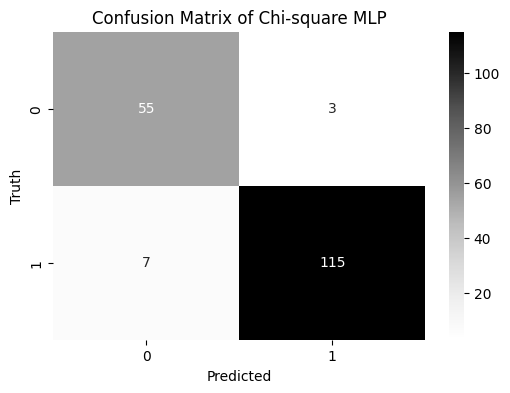

In [91]:
# Model fit
model_mlp_final.fit(X_train_chi_norm,y_train)
# Model evaluation with the selected features
model_report(y_test, model_mlp_final.predict(X_test_chi_norm), algorithm="Chi-square MLP")

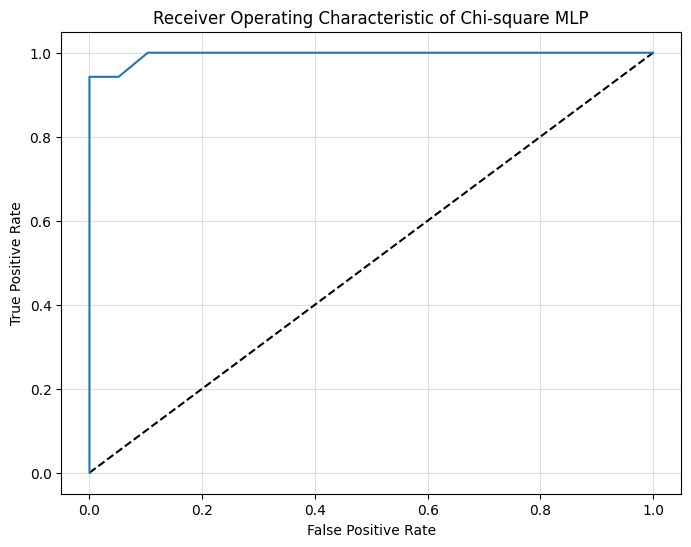

In [92]:
plot_roc_curve(model_mlp_final, X_test_chi_norm, y_test,RFC = True ,algorithm='Chi-square MLP')

#### XGBoost

Accuracy =  0.9444444444444444
Precision =  0.9463884332665087
Recall\Sensitivity =  0.9444444444444444
Specificity =  0.9482758620689655
F1 Score =  0.9449074074074074
AUC Score = 0.9454494064443189
Kappa score =  0.8750694058856191
Log Loss =  2.002425188284286 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        58
           1       0.97      0.94      0.96       122

    accuracy                           0.94       180
   macro avg       0.93      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180



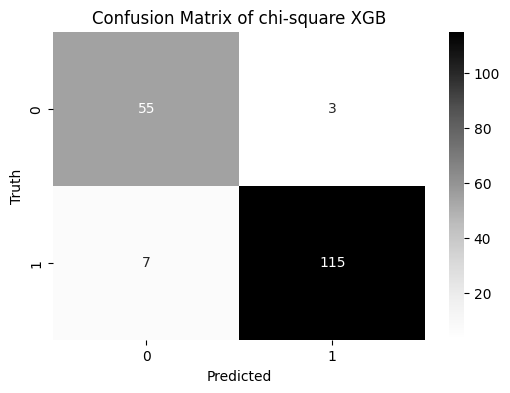

In [93]:
model_xgb_final.fit(X_train_chi_norm, y_train)
model_report(y_test, model_xgb_final.predict(X_test_chi_norm),"chi-square XGB")

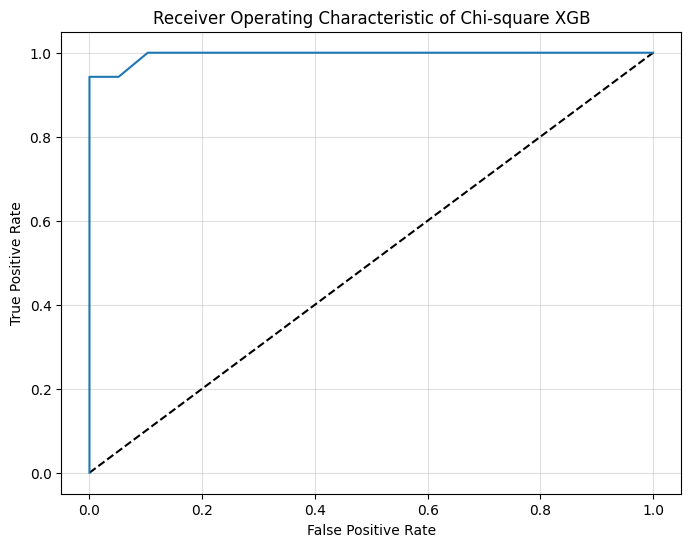

In [94]:
plot_roc_curve(model_xgb_final, X_test_chi_norm, y_test,RFC = True ,algorithm='Chi-square XGB')

#### ANN

In [95]:
model_ann = keras.Sequential([
    keras.layers.Dense(18, input_shape = (8,), activation = 'tanh'),
    keras.layers.Dense(15, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])
model_ann.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model_ann.fit(X_train_chi_norm, y_train, epochs = 15)

Epoch 1/15

14/14 [==============================] - 1s 2ms/step - loss: 0.6818 - accuracy: 0.6379
Epoch 2/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5842 - accuracy: 0.8849
Epoch 3/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8873
Epoch 4/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.8945
Epoch 5/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.9281
Epoch 6/15
14/14 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.9281
Epoch 7/15
14/14 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.9329
Epoch 8/15
14/14 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.9329
Epoch 9/15
14/14 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9329
Epoch 10/15
14/14 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9448
Epoch 11/15
14/14 

6/6 [==============================] - 0s 2ms/step
Accuracy =  0.9333333333333333
Precision =  0.9341666666666667
Recall\Sensitivity =  0.9333333333333333
Specificity =  0.9137931034482759
F1 Score =  0.9336228229910819
AUC Score = 0.928208027133974
Kappa score =  0.8487394957983193
Log Loss =  2.4029102259411435 

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        58
           1       0.96      0.94      0.95       122

    accuracy                           0.93       180
   macro avg       0.92      0.93      0.92       180
weighted avg       0.93      0.93      0.93       180



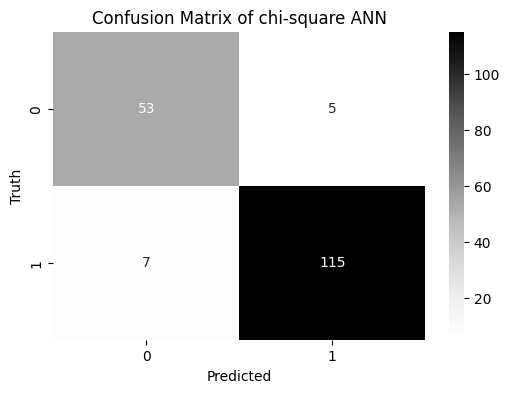

In [96]:
y_pred_ann = model_ann.predict(X_test_chi_norm)
y_pred_ann2 = []
for elem in y_pred_ann:
    if elem > 0.5:
        y_pred_ann2.append(1)
    else:
        y_pred_ann2.append(0)
y_pred_ann2[:5]
model_report(y_test, y_pred_ann2,"chi-square ANN")

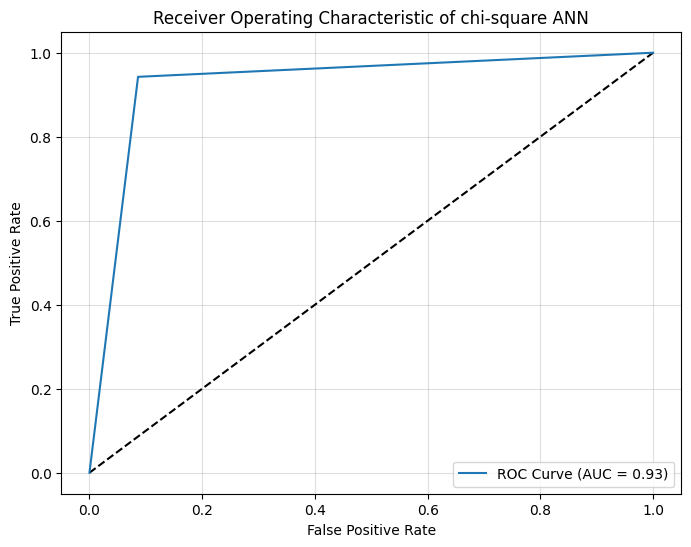

In [97]:
images_folder = "images"

if not os.path.exists(images_folder):
    os.mkdir(images_folder)
fpr, tpr,_ = roc_curve(y_test, y_pred_ann2)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of chi-square ANN')
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.savefig(os.path.join(images_folder, f"chi-square ANN roc_curve.png"), dpi=600)
plt.show()  

## F-classify

In [98]:
# Library for f classifyer feature selection
from sklearn.feature_selection import f_classif

In [99]:
# f and p value calculation
f_stat, p_values = f_classif(X_train_norm,y_train)

In [100]:
f_class_df = pd.DataFrame([X.columns, var_names, f_stat, p_values], index = ["Variables","Features","F_values", "P_values"]).T
f_class_df.head()

,Variables,Features,F_values,P_values
0,Birth_order,BO,9.840021,0.001829
1,BreastFeeding,BF,3.083741,0.079816
2,Fathers_age,FA,3.531147,0.060927
3,Mothers_age,MA,602.483844,0.0
4,Socio_economic,SE,5.404761,0.020564


In [101]:
f_class_sorted = f_class_df.sort_values("P_values")

In [102]:
# significant features for f classify
f_class_df_sig = f_class_sorted[f_class_sorted["P_values"] < 0.05]
f_class_df_sig.shape

(21, 4)

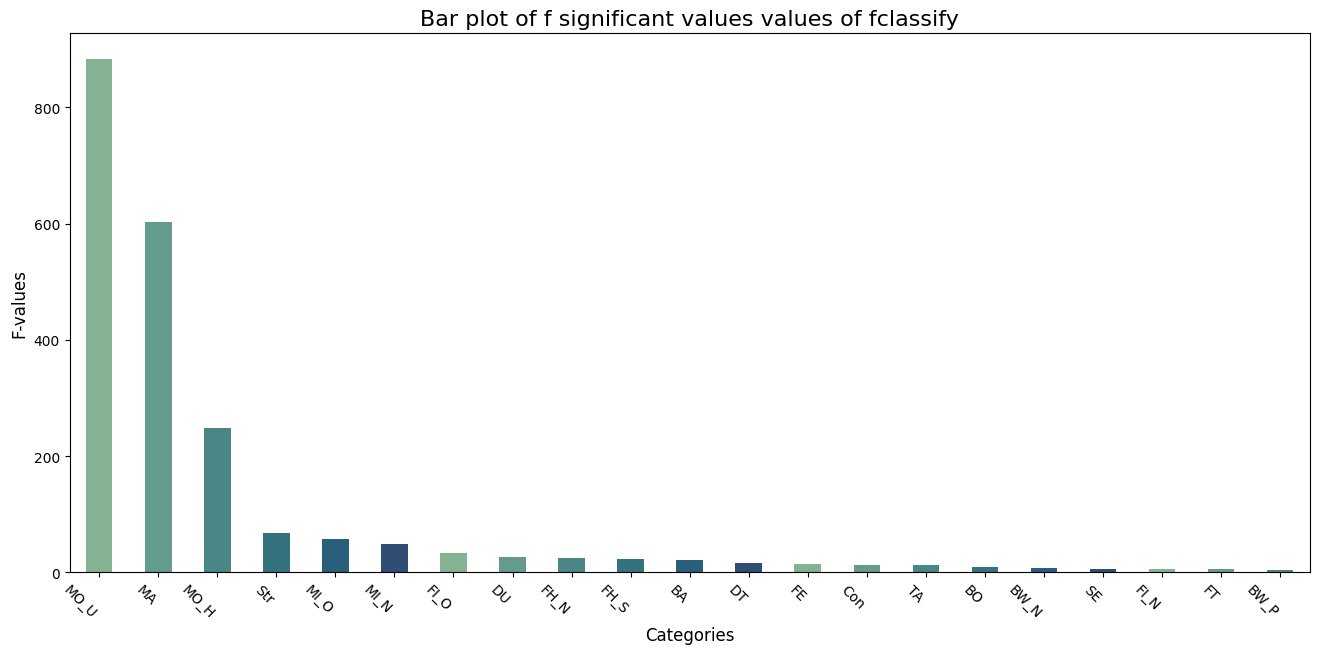

In [103]:
# bar plot of significnat f values
plt.figure(figsize = (16,7))
crest_palette = sns.color_palette("crest", as_cmap=False)
sns.barplot(x = f_class_df_sig["Features"], y =f_class_df_sig["F_values"],width = 0.5 , palette = crest_palette,saturation=0.75,gap = .1,
        )
plt.title("Bar plot of f significant values values of fclassify", fontsize = 16)
plt.xlabel("Categories", fontsize = 12)
plt.ylabel("F-values", fontsize = 12)
plt.xticks(rotation=-45, ha='right')
plt.savefig("./images/f_classify_selected_feature.png", dpi = 600)
plt.show()

In [104]:
df2_f_class = df2[f_class_df_sig.Variables]
df2_f_class.shape

(597, 21)

### Model Evaluation with f-classify selected features

In [105]:
# train test split for f classify significant features
X_train_f, X_test_f, y_train, y_test = train_test_split(df2_f_class,y, random_state=42, test_size=.3, stratify=y)

In [106]:
X_train_f_norm = normalizer.fit_transform(X_train_f)
X_test_f_norm = normalizer.fit_transform(X_test_f)

#### Logistic Regression

Accuracy =  0.9833333333333333
Precision =  0.9833262016830695
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9655172413793104
F1 Score =  0.9832948831706596
AUC Score = 0.9786602600339176
Kappa score =  0.9616695059625213
Log Loss =  0.6007275564852861 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.98      0.99      0.99       122

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



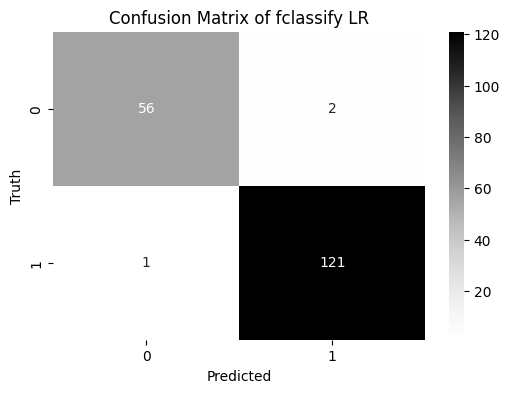

In [107]:
model_logit_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_logit_final.predict(X_test_f_norm),"fclassify LR")

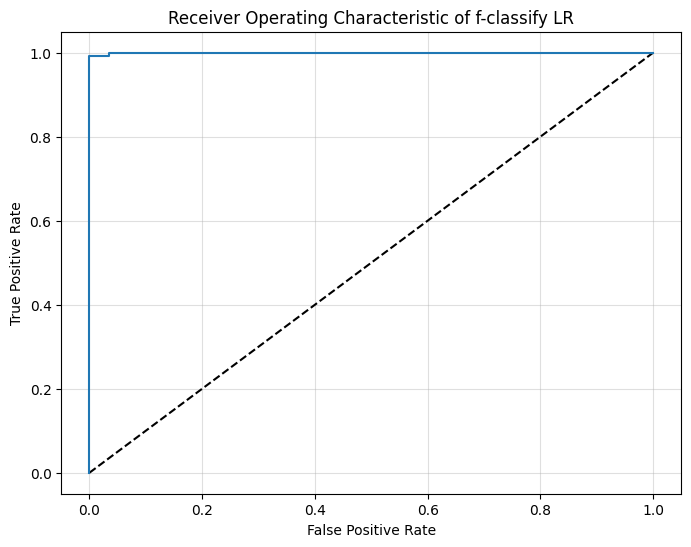

In [108]:
plot_roc_curve(model_logit_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify LR')

#### SVM

Accuracy =  0.9888888888888889
Precision =  0.9888888888888889
Recall\Sensitivity =  0.9888888888888889
Specificity =  0.9827586206896551
F1 Score =  0.9888888888888889
AUC Score = 0.9872809496890899
Kappa score =  0.9745618993781797
Log Loss =  0.40048503765685745 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.99      0.99      0.99       122

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



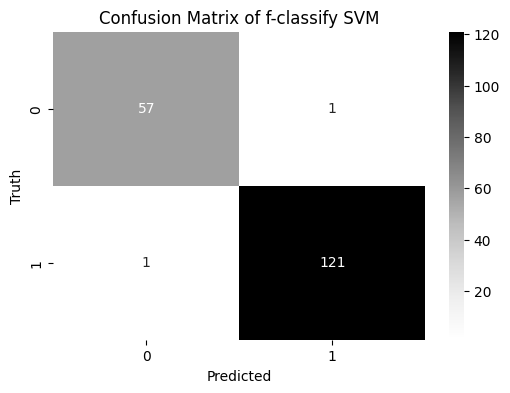

In [109]:
model_svm_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_svm_final.predict(X_test_f_norm),"f-classify SVM")

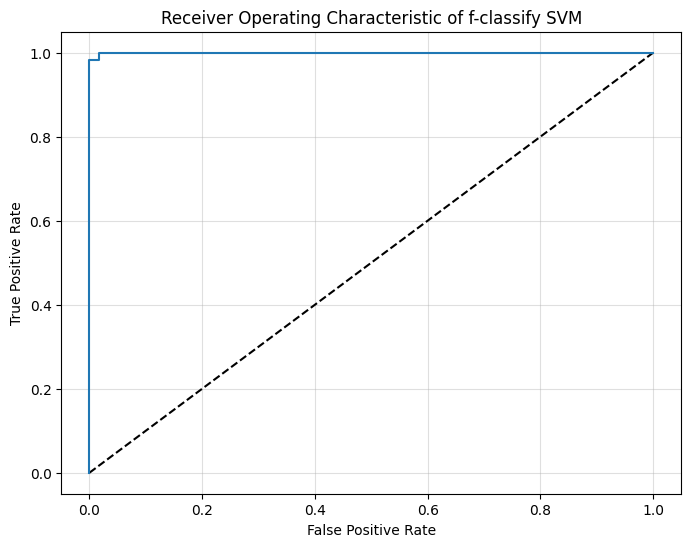

In [110]:
plot_roc_curve(model_svm_final, X_test_f_norm, y_test,RFC = False ,algorithm='f-classify SVM')

#### Random Forest

Accuracy =  0.9833333333333333
Precision =  0.9837333333333333
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9482758620689655
F1 Score =  0.9832133089701791
AUC Score = 0.9741379310344828
Kappa score =  0.9613180515759312
Log Loss =  0.6007275564852861 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.98      1.00      0.99       122

    accuracy                           0.98       180
   macro avg       0.99      0.97      0.98       180
weighted avg       0.98      0.98      0.98       180



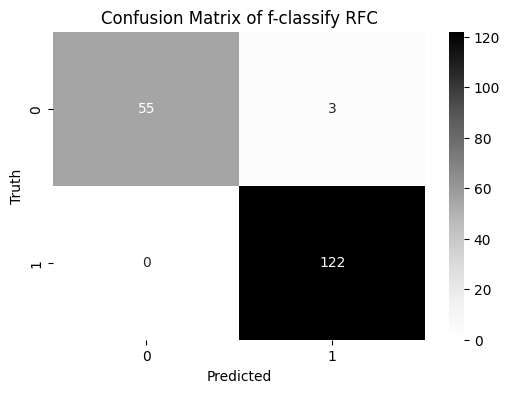

In [111]:
model_rfc_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_rfc_final.predict(X_test_f_norm),"f-classify RFC")

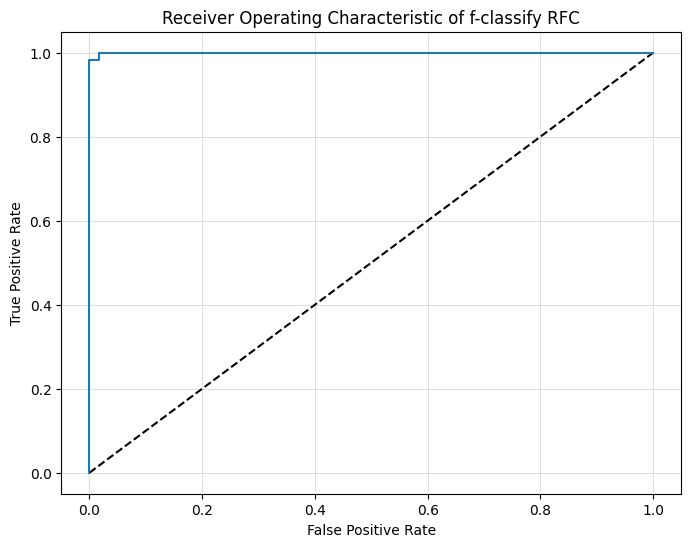

In [112]:
plot_roc_curve(model_rfc_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify RFC')

#### Decision Tree

Accuracy =  0.9944444444444445
Precision =  0.9944896115627823
Recall\Sensitivity =  0.9944444444444445
Specificity =  0.9827586206896551
F1 Score =  0.9944316277235531
AUC Score = 0.9913793103448275
Kappa score =  0.9872231686541738
Log Loss =  0.20024251882842883 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.99      1.00      1.00       122

    accuracy                           0.99       180
   macro avg       1.00      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



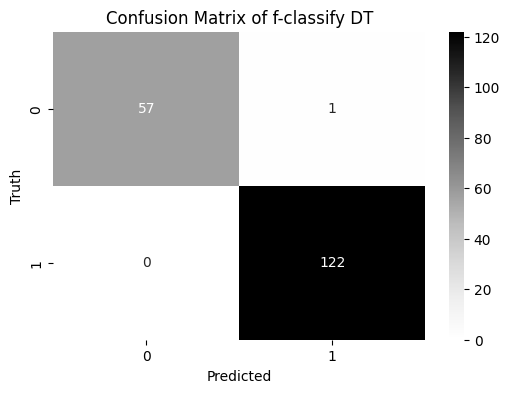

In [113]:
model_dt_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_dt_final.predict(X_test_f_norm),"f-classify DT")

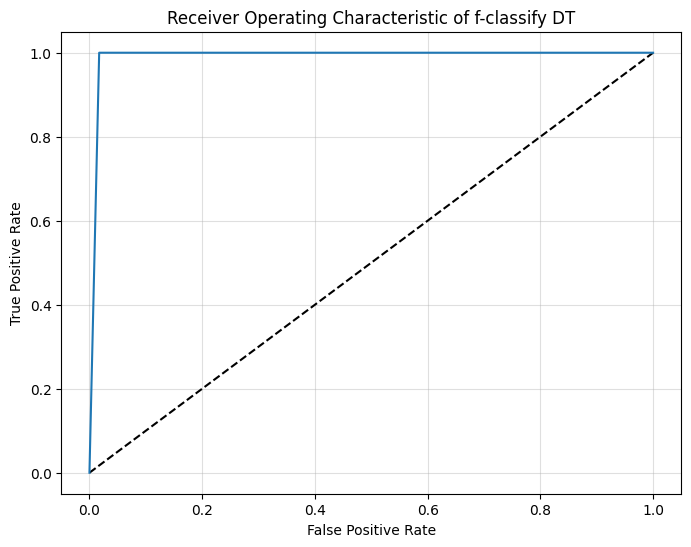

In [114]:
plot_roc_curve(model_dt_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify DT')

#### Naive Bayes

Accuracy =  0.9222222222222223
Precision =  0.9222222222222223
Recall\Sensitivity =  0.9222222222222223
Specificity =  0.8793103448275862
F1 Score =  0.9222222222222223
AUC Score = 0.9109666478236291
Kappa score =  0.8219332956472584
Log Loss =  2.803395263598001 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.94      0.94      0.94       122

    accuracy                           0.92       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.92      0.92       180



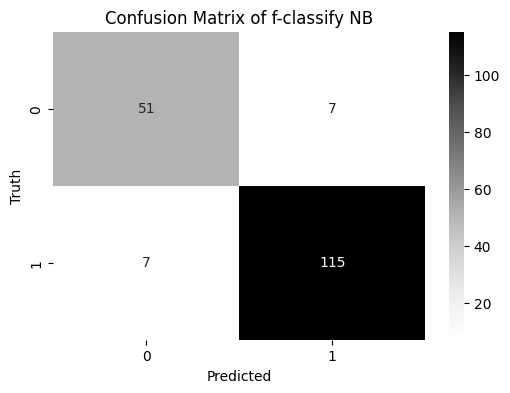

In [115]:
model_nb_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_nb_final.predict(X_test_f_norm),"f-classify NB")

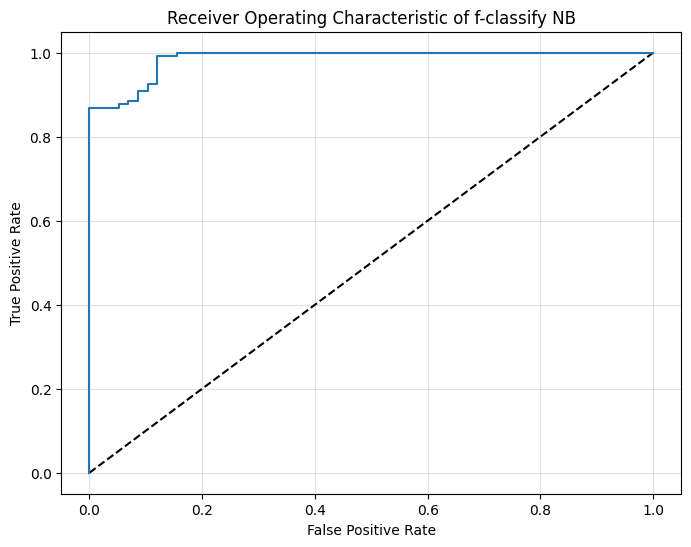

In [116]:
plot_roc_curve(model_nb_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify NB')

#### KNN

Accuracy =  0.9722222222222222
Precision =  0.9721627918033565
Recall\Sensitivity =  0.9722222222222222
Specificity =  0.9482758620689655
F1 Score =  0.9721581386177659
AUC Score = 0.9659412097230073
Kappa score =  0.9361158432708688
Log Loss =  1.0012125941421433 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.98      0.98      0.98       122

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



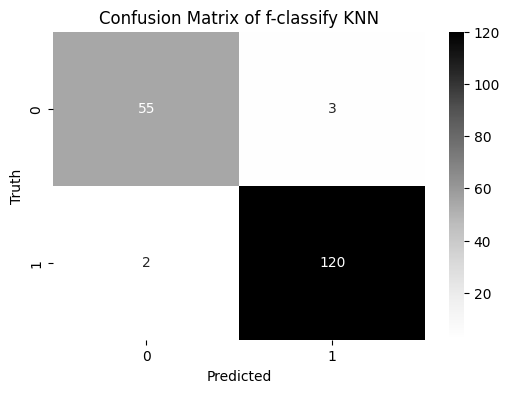

In [117]:
model_knn_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_knn_final.predict(X_test_f_norm),"f-classify KNN")

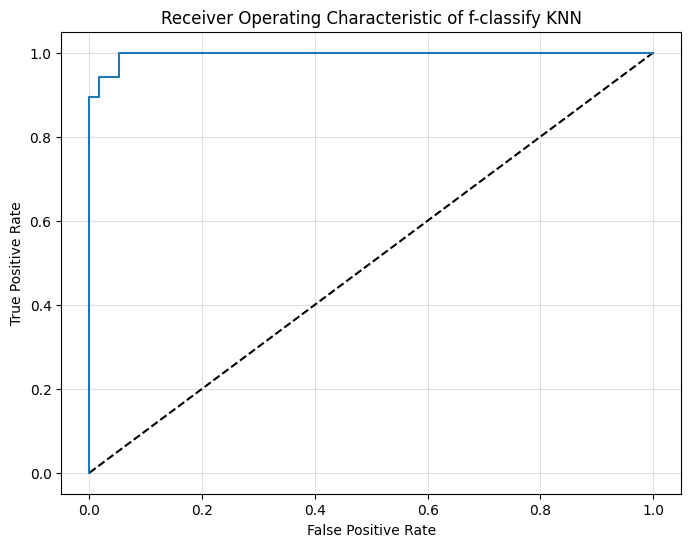

In [118]:
plot_roc_curve(model_knn_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify KNN')

#### MLP

Accuracy =  0.9888888888888889
Precision =  0.989068100358423
Recall\Sensitivity =  0.9888888888888889
Specificity =  0.9655172413793104
F1 Score =  0.9888365901202871
AUC Score = 0.9827586206896552
Kappa score =  0.9743297204791785
Log Loss =  0.40048503765685745 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.98      1.00      0.99       122

    accuracy                           0.99       180
   macro avg       0.99      0.98      0.99       180
weighted avg       0.99      0.99      0.99       180



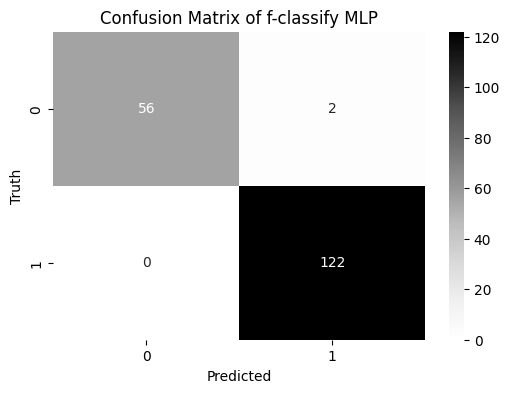

In [119]:
# mlp model fitting
model_mlp_final.fit(X_train_f_norm,y_train)
# model evaluation
model_report(y_test, model_mlp_final.predict(X_test_f_norm), "f-classify MLP")

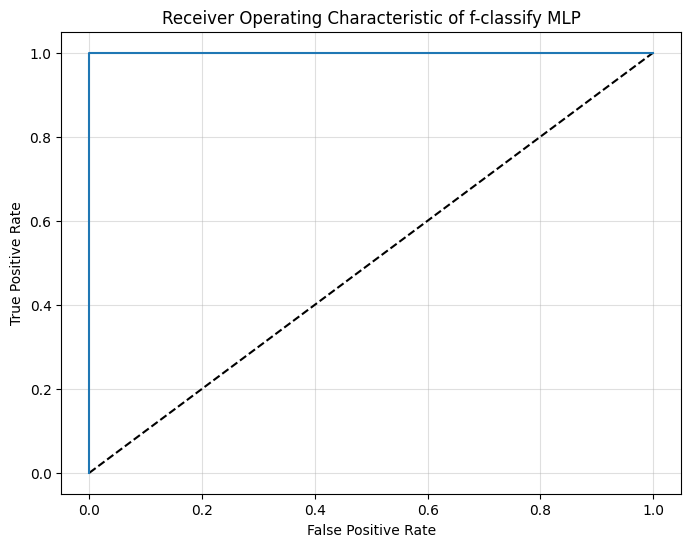

In [120]:
plot_roc_curve(model_mlp_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify MLP')

#### XGBoost

Accuracy =  0.9833333333333333
Precision =  0.9837333333333333
Recall\Sensitivity =  0.9833333333333333
Specificity =  0.9482758620689655
F1 Score =  0.9832133089701791
AUC Score = 0.9741379310344828
Kappa score =  0.9613180515759312
Log Loss =  0.6007275564852861 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.98      1.00      0.99       122

    accuracy                           0.98       180
   macro avg       0.99      0.97      0.98       180
weighted avg       0.98      0.98      0.98       180



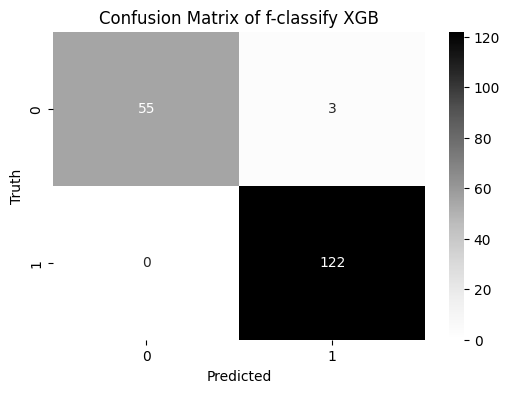

In [121]:
model_xgb_final.fit(X_train_f_norm, y_train)
model_report(y_test, model_xgb_final.predict(X_test_f_norm),"f-classify XGB")

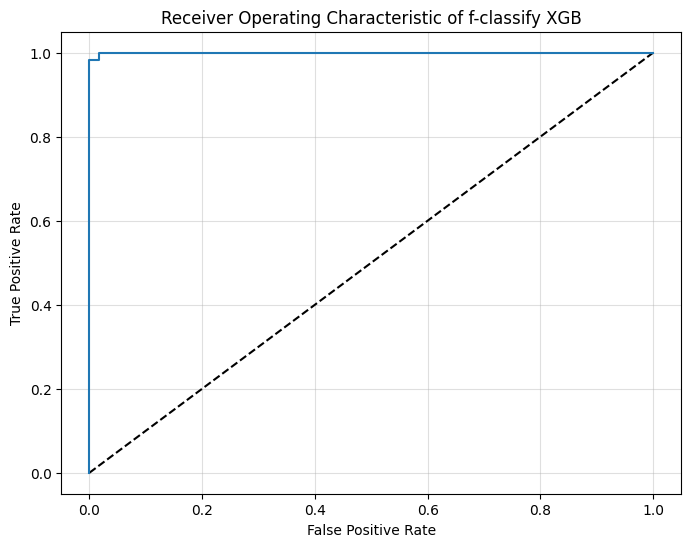

In [122]:
plot_roc_curve(model_xgb_final, X_test_f_norm, y_test,RFC = True ,algorithm='f-classify XGB')

#### ANN

In [123]:
model_ann = keras.Sequential([
    keras.layers.Dense(21, input_shape = (21,), activation = 'tanh'),
    keras.layers.Dense(15, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])
model_ann.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model_ann.fit(X_train_f_norm, y_train, epochs = 15)

Epoch 1/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5952 - accuracy: 0.6715
Epoch 2/15
14/14 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.6763
Epoch 3/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.6882
Epoch 4/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7146
Epoch 5/15
14/14 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7698
Epoch 6/15
14/14 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7770
Epoch 7/15
14/14 [==============================] - 0s 3ms/step - loss: 0.4043 - accuracy: 0.7938
Epoch 8/15
14/14 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8297
Epoch 9/15
14/14 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8921
Epoch 10/15
14/14 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.9017
Epoch 11/15
14/14 [

6/6 [==============================] - 0s 2ms/step
Accuracy =  0.9611111111111111
Precision =  0.9618993380544413
Recall\Sensitivity =  0.9611111111111111
Specificity =  0.896551724137931
F1 Score =  0.9606256859268907
AUC Score = 0.9441775014132279
Kappa score =  0.9089068825910931
Log Loss =  1.4016976317990004 

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        58
           1       0.95      0.99      0.97       122

    accuracy                           0.96       180
   macro avg       0.97      0.94      0.95       180
weighted avg       0.96      0.96      0.96       180



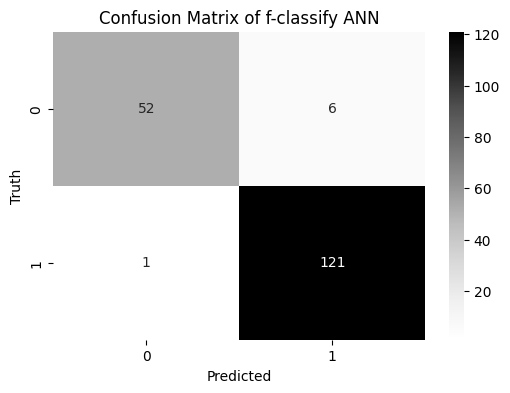

In [124]:
y_pred_ann_f =model_ann.predict(X_test_f_norm)
y_pred_ann_f2 = []
for elem in y_pred_ann_f:
    if elem > 0.5:
        y_pred_ann_f2.append(1)
    else:
        y_pred_ann_f2.append(0)

model_report(y_test, y_pred_ann_f2,"f-classify ANN")

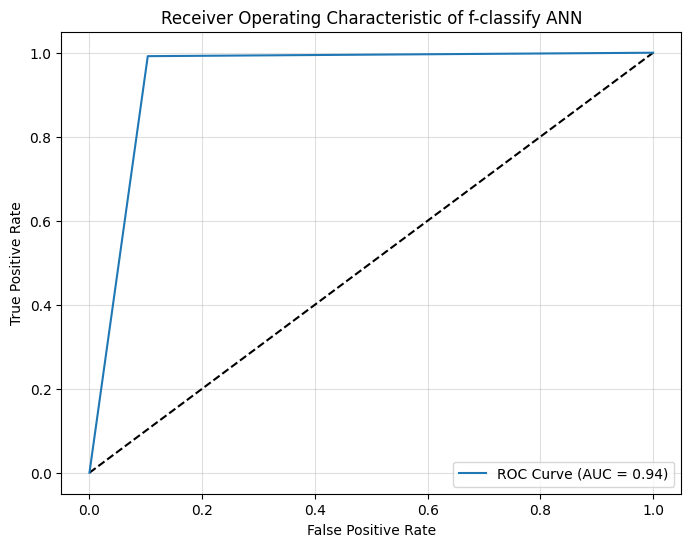

In [125]:
images_folder = "images"

if not os.path.exists(images_folder):
    os.mkdir(images_folder)
fpr, tpr,_ = roc_curve(y_test, y_pred_ann_f2)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
fig, ax = plt.subplots(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of f-classify ANN')
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.savefig(os.path.join(images_folder, f"f-classify ANN roc_curve.png"), dpi=600)
plt.show()  